In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import utils

In [2]:
dic = {"combination1": 2, "combination3": 3}

In [3]:
# Convert the dictionary into a DataFrame
df = pd.DataFrame(list(dic.items()), columns=["Combination", "Value"])
df

,Combination,Value
0,combination1,2
1,combination3,3


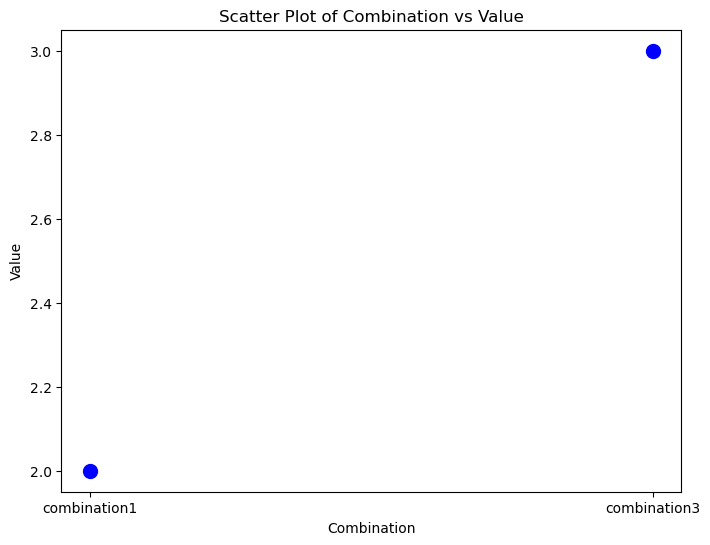

In [4]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["Combination"], df["Value"], color='blue', s=100)

# Add labels and title
plt.xlabel("Combination")
plt.ylabel("Value")
plt.title("Scatter Plot of Combination vs Value")

# Show the plot
plt.show()

In [5]:
iterations = 10
burn_in = 4
thining = 2
n_shuffle = 2
real_order = [1, 3, 5, 2, 4]
S_ordering = np.array([
    'HIP-FCI', 'PCC-FCI', 'HIP-GMI', 'FUS-GMI', 'FUS-FCI'
])
real_theta_phi = pd.read_csv('data/means_stds.csv')

ns = [25, 50, 100, 150, 200]
rs = [0.1, 0.2, 0.3, 0.5, 0.6]
uniform_prior = True

In [6]:
participants_data = utils.generate_data_from_ebm(
    n_participants = 25, 
    S_ordering = S_ordering, 
    real_theta_phi = real_theta_phi, 
    healthy_ratio = 0.4,
    seed=1234,
)

data generation done!


In [7]:
participants_data

,participant,biomarker,measurement,diseased
0,0,HIP-FCI (1),6.125923,False
1,1,HIP-FCI (1),-2.750416,True
2,2,HIP-FCI (1),-4.168580,True
3,3,HIP-FCI (1),4.055923,False
4,4,HIP-FCI (1),4.772009,False
...,...,...,...,...
120,20,FUS-GMI (4),0.515970,True
121,21,FUS-GMI (4),0.535865,True
122,22,FUS-GMI (4),0.653162,False
123,23,FUS-GMI (4),0.565044,True


In [8]:
comb_str = f"25_0.4"
log_folder_name = f"n_and_r/logs/{comb_str}"

In [9]:
biomarker_best_order_dic, \
participant_stages, \
all_dicts, \
all_current_participant_stages,\
all_current_order_dicts, \
all_current_likelihoods, \
all_current_acceptance_ratios, \
final_acceptance_ratio = utils.metropolis_hastings_with_conjugate_priors(
    participants_data, iterations, log_folder_name, n_shuffle, uniform_prior,
)

iteration 10 done, current accepted likelihood: -150.7683096578432, current acceptance ratio is 30.00 %, current accepted order is {'HIP-FCI (1)': 1, 'HIP-GMI (3)': 3, 'FUS-FCI (5)': 5, 'PCC-FCI (2)': 2, 'FUS-GMI (4)': 4}, 
done!
